<a href="https://colab.research.google.com/github/DmitryiLaptev/NumericalMethods_HW/blob/main/4_%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Линейная интреполяция
from scipy.interpolate import interp1d

x_points = [20, 21, 22, 23, 24, 25] # random x values
y_points = [0.99823, 0.998019, 0.997797, 0.997565, 0.997323, 0.997071] # random y values

# Finding the interpolation
for i in (21.5, 22.7, 24.3):
  interpolate_x = i
  y_interp = interp1d(x_points, y_points)
  print(interpolate_x, y_interp(interpolate_x))

21.5 0.997908
22.7 0.9976346
24.3 0.9972474


In [2]:
# Интерполяция кубическим сплайном
from scipy import interpolate

def f(x):
    x_points = [20, 21, 22, 23, 24, 25]
    y_points = [0.99823, 0.998019, 0.997797, 0.997565, 0.997323, 0.997071]

    tck = interpolate.splrep(x_points, y_points)
    return interpolate.splev(x, tck)
for i in (21.5, 22.7, 24.3):
  print(i, f(i))

21.5 0.9979092958333333
22.7 0.9976356418333333
24.3 0.9972484469666665


In [3]:
# Линейная интерполяция
import matplotlib.pyplot as plt
from bisect import bisect_right

class Interpolate:
    def __init__(self, x_list, y_list):
        if any(y - x <= 0 for x, y in zip(x_list, x_list[1:])):
            raise ValueError("x_list must be in strictly ascending order!")
        self.x_list = x_list
        self.y_list = y_list
        intervals = zip(x_list, x_list[1:], y_list, y_list[1:])
        self.slopes = [(y2 - y1) / (x2 - x1) for x1, x2, y1, y2 in intervals]

    def __call__(self, x):
        if not (self.x_list[0] <= x <= self.x_list[-1]):
            raise ValueError("x out of bounds!")
        if x == self.x_list[-1]:
            return self.y_list[-1]
        i = bisect_right(self.x_list, x) - 1
        return self.y_list[i] + self.slopes[i] * (x - self.x_list[i])
interp = Interpolate([20, 21, 22, 23, 24, 25], [0.99823, 0.998019, 0.997797, 0.997565, 0.997323, 0.997071])
interp(22.7)

0.9976346

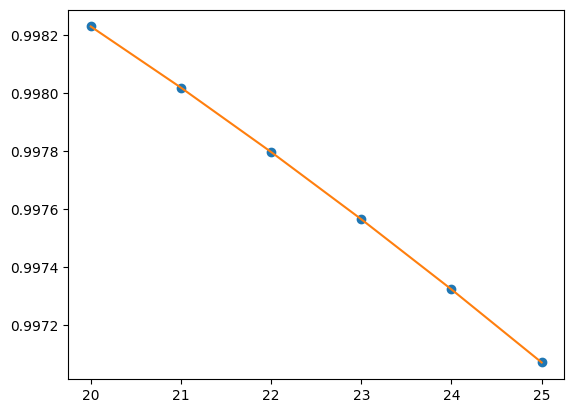

In [4]:
# Линейная интерполяция
import numpy as np
import matplotlib.pyplot as plt
x = [20, 21, 22, 23, 24, 25]
y = [0.99823, 0.998019, 0.997797, 0.997565, 0.997323, 0.997071]
xvals = np.linspace(20, 25, 100)
yinterp = np.interp(xvals, x, y)
plt.plot(x, y, 'o')
plt.plot(xvals, yinterp)
plt.show()

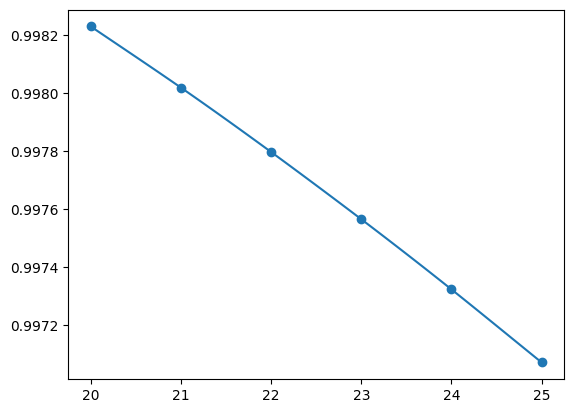

In [5]:
# Интерполяция кубическим сплайном
import numpy as np
from math import sqrt

def cubic_interp1d(x0, x, y):

    x = np.asfarray(x)
    y = np.asfarray(y)

    # remove non finite values
    # indexes = np.isfinite(x)
    # x = x[indexes]
    # y = y[indexes]

    # check if sorted
    if np.any(np.diff(x) < 0):
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]

    size = len(x)

    xdiff = np.diff(x)
    ydiff = np.diff(y)

    # allocate buffer matrices
    Li = np.empty(size)
    Li_1 = np.empty(size-1)
    z = np.empty(size)

    # fill diagonals Li and Li-1 and solve [L][y] = [B]
    Li[0] = sqrt(2*xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0 # natural boundary
    z[0] = B0 / Li[0]

    for i in range(1, size-1, 1):
        Li_1[i] = xdiff[i-1] / Li[i-1]
        Li[i] = sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size - 1
    Li_1[i-1] = xdiff[-1] / Li[i-1]
    Li[i] = sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0 # natural boundary
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    # solve [L.T][x] = [y]
    i = size-1
    z[i] = z[i] / Li[i]
    for i in range(size-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

    # find index
    index = x.searchsorted(x0)
    np.clip(index, 1, size-1, index)

    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0

    # calculate cubic
    f0 = zi0/(6*hi1)*(xi1-x0)**3 + \
         zi1/(6*hi1)*(x0-xi0)**3 + \
         (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + \
         (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0

if __name__ == '__main__':
    import matplotlib.pyplot as plt
    x = [20, 21, 22, 23, 24, 25]
    y = [0.99823, 0.998019, 0.997797, 0.997565, 0.997323, 0.997071]
    plt.scatter(x, y)

    x_new = np.linspace(20, 25, 100)
    plt.plot(x_new, cubic_interp1d(x_new, x, y))

    plt.show()